In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('mnist.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [8]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [10]:
data["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [12]:
data.shape

(42000, 785)

In [14]:
X = data.drop(columns = ['label'])
y = data['label']

In [16]:
X.shape

(42000, 784)

In [18]:
y.shape

(42000,)

In [20]:
# X = X.reshape(9len(X),28,28,1)

In [50]:

X = X.reshape((len(X),28,28,1))

In [52]:
X.shape

(42000, 28, 28, 1)

In [54]:
X = X/255

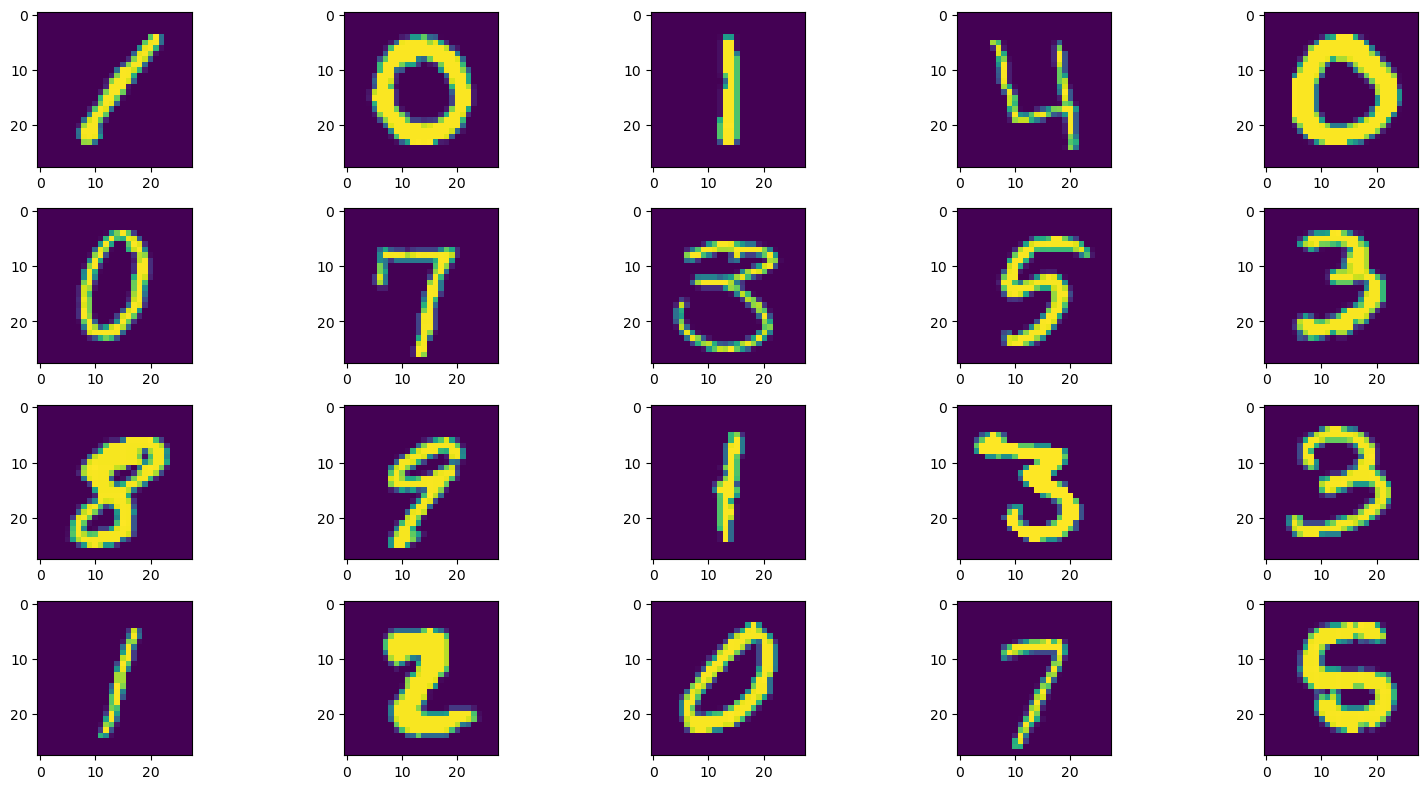

In [56]:
plt.figure(figsize =(16,8))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i])

plt.tight_layout()

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [60]:
X_train.shape

(33600, 28, 28, 1)

In [62]:
X_test.shape

(8400, 28, 28, 1)

In [64]:
model = keras.Sequential([
                    keras.layers.Flatten(input_shape = (28,28)),#
                    keras.layers.Dense(100,activation ="relu"), 
                    keras.layers.Dense(10,activation ="relu"), 
                
    
])

C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train,y_train, epochs = 5, validation_split =0.05)

Epoch 1/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1492 - loss: 2.5522 - val_accuracy: 0.1232 - val_loss: 2.2423
Epoch 2/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1183 - loss: 2.2683 - val_accuracy: 0.1143 - val_loss: 2.2629
Epoch 3/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1167 - loss: 2.2675 - val_accuracy: 0.1161 - val_loss: 2.2587
Epoch 4/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1127 - loss: 2.2654 - val_accuracy: 0.1167 - val_loss: 2.2574
Epoch 5/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0972 - loss: 2.3034 - val_accuracy: 0.0970 - val_loss: 2.3026


In [70]:
model.evaluate(X_train,y_train)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.0863 - loss: 6.4263


[6.4365081787109375, 0.08336309343576431]

In [72]:
prediction = model.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


In [74]:
predicted_values = [np.argmax(i) for i in prediction]

In [76]:
y_test

30651    2
34452    9
39754    8
29441    1
39143    1
        ..
37678    9
17771    3
28072    8
3499     1
23677    6
Name: label, Length: 8400, dtype: int64

In [78]:
y_test.reset_index(drop = True, inplace = True)

In [80]:
np.argmax(prediction[1])

3

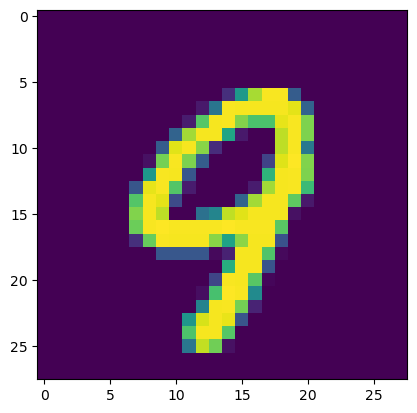

In [82]:
plt.imshow(X_test[1])

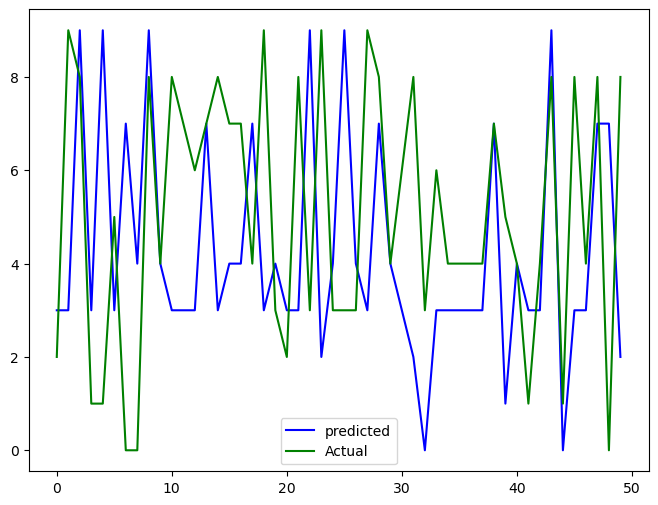

In [84]:
# plot the accuracy of our prediction

c = range(len(predicted_values))

plt.figure(figsize =(8,6))

plt.plot(c[:50], predicted_values[:50], color = 'blue')
plt.plot(c[:50], y_test[:50], color = 'green')

plt.legend(['predicted', 'Actual'])

plt.show()


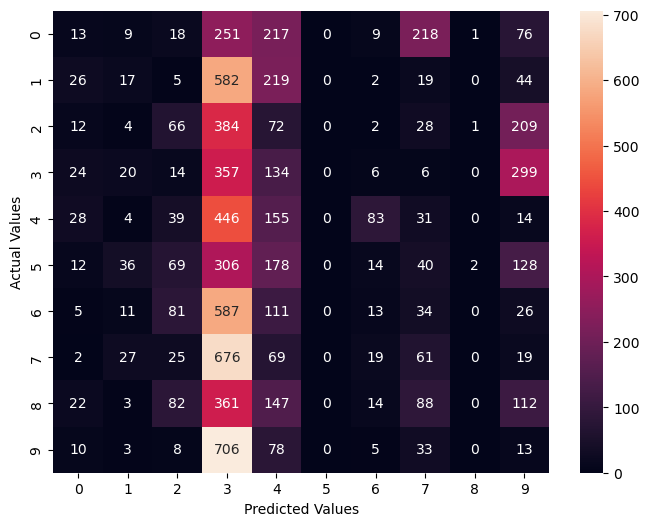

In [86]:
plt.figure(figsize =(8,6))

sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()